# A Practical Example of Data Preprocessing

### Data preprocessing workflow

**Prelude: Acquiring data**

**Steps in data preprocessing**
1. Reading in data
2. Exploration of data
3. Identify missing data
4. Exploratory data analysis (EDA)
5. Handle missing data
6. Encode categorical variables
7. Splitting data into training and test sets
8. Feature scaling

##### Prelude: Acquiring data

Depending on your project, data may not be readily available in a usable format

- Data Wrangling, also called data munging, is the process of compiling "raw" data from a source or sources and applying preprocessing techniques to make it viable for downstream processes including:
  - Storage in a data warehouse (a repository of formatted or "clean" data that enables integrated processes to have easy access to it)
  - Training predictive models
  - Record keeping
> A data warehouse is like a library; the library stores books (i.e. "cleaned data") that others with access can use for various tasks (i.e. checking out for research, reading, etc.) 

Gathering data (e.g. web scraping, data warehouse accessing, etc.) is often the first step, however, for illustrative purposes, this notebook makes use of a publicly available dataset hosted on Kaggle called the [IBM HR Analytics Employee Attrition & Performance Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

## Data Preprocessing Pipeline

### Reading in the data

- This process is fairly consistent, but can have nuance depending on where you're data are sourced from
  - If from a database (e.g. SQL database), we can use mysql-connector-python to query a database and convert the output into one that can be inserted into a pandas DataFrame
    - Other methods use libraries such as `pymysql` and `sqlalchemy`

For our purposes, we only need to use `pd.read_csv()` method
  - By default, `read_csv()` assumes the data are comma-separated. You may need to use `sep=<some_separator>` such as `\t` if the data are tab-separated  

In [1]:
# Import of necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas display options
pd.set_option('display.max_columns', 50)

In [2]:
# Import the data as raw_data
raw_data = pd.read_csv('/home/noahagreenman/repos/Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Exploring the data

- Using either `your_dataframe.head()` & `your_dataframe.tail()` or `your_dataframe.shape` to get a sense of the size of your dataset
  - This dataset has 1470 rows, and 35 columns
- The dependent (y) variable is the `Attrition` column
- All other features could be independent variables used in a machine learning algorithm, however you may not use all of them <details><summary>SPOILER!!!</summary>We will not use all features</details>

**A major benefit of looking at the structure of your data, including feature data types, is it can provide valuable context should you have to handle missing data**

In [3]:
# View the first 5 entries
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# View the last 5 entries (determine number of rows in dataset)
raw_data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [5]:
# Alternative: use <your_dataframe>.shape to get (rows, columns)
raw_data.shape

(1470, 35)

In [6]:
# Explore the datatypes in our columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Examine numerical data statistics
raw_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Examine data for missing values

- In the chosen dataset, none of the columns have missing values (rare in most "real data" cases)
- Typically, missing data can be handled in several ways
  1. If the dataset is sufficiently large and missing values make up a small percentage (less than 5%), they could be removed without affecting model performance
  2. If missing data are in an essential column, the mechanism that resulted in their absence needs to be investigated

#### Mechanisms of missing data
1. Missing Completely At Random (MCAR)
   - Occurs when the reason for data being missing has nothing to do with the data itself
> MCAR example: Losing an individual survey has nothing to do with the data of the survey itself, therefore its loss is not a feature of the data 
2. Missing At Random (MAR)
    - Occurs when a missing value is explainable with available information from the dataset
> MAR example: If looking at the relationship between blood pressure and cardiovascular disease risk, younger individuals may not have blood pressure readings due to a presumption of low-risk. In this case, we have certain features that can inform our imputation of blood pressure for missing readings in young patients
3. Missing Not At Random (MNAR)
    - Occurs when missing data could be explained by unavailable features and thus an assumption of the distribution is not valid
> MNAR example: In a BMI study, overweight patients will tend to have full BMI data whereas patients with healthy weight may be skipped. Due to the nature of BMI, where within stratified groups measurements can vary widely, we cannot assume the data are missing at random since unaccounted features provide essential contextualization

>See [this article by Bhaskaran and Smeeth](https://pmc.ncbi.nlm.nih.gov/articles/PMC4121561/) detailing the differences between MCAR, MAR, and MNAR

**In general, standard imputation methods may be viable for MCAR and MAR data, however careful consideration must be given for MNAR data**

In [8]:
raw_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Data visualization

In [9]:
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Several features are already replaced by numerical values representing different levels. For these, the order is important (e.g. for education, 5 means "doctorate" where as 1 means "below college")
- Education
- EnvironmentalSatisfaction
- JobInvolvement
- JobSatisfaction
- PerformanceRating
- RelationshipSatisfaction
- WorkLifeBalance

Certain features will be excluded since they do not offer any additional information useful to a predictive model

Removed features:
- DailyRate
- EmployeeNumber
- EmployeeCount
- EducationField
- Over18
- StandardHours
- TrainingTimesLastYear
- OverTime

Feature notes:
- OverTime is binary (Yes/No), likely asking the employee ever worked over time
  - Seemingly no relationship, thus it was dropped
- No numerical features upon inspection with `pd.DataFrame.describe()` appeared to have any obvious outliers

In [11]:
# Will need to encode these features using OneHotEncoder since we're unsure if there's a defined order to the labels
raw_data['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [12]:
# Higher StockOptionLevel likely means better stock options
raw_data['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

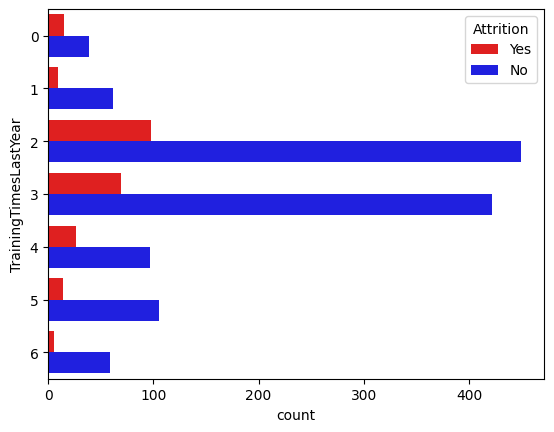

In [13]:
# Explore TrainingTimesLastYear
sns.countplot(data=raw_data, y='TrainingTimesLastYear', hue='Attrition', palette={'Yes':'red', 'No':'blue'})
plt.show()

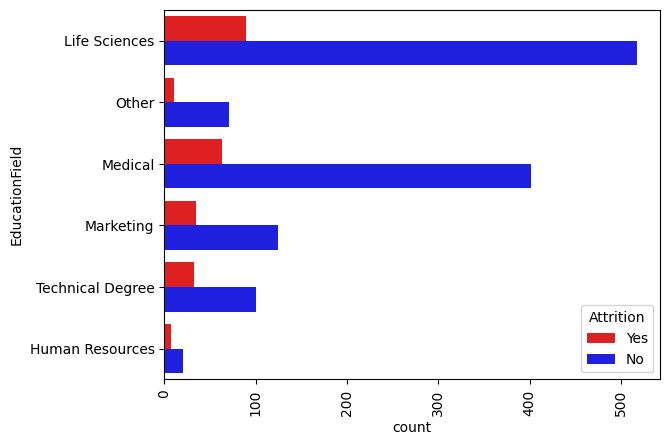

In [14]:
# Visualize rate of attrition by EducationField
sns.countplot(data=raw_data, y='EducationField', hue='Attrition', palette={'Yes':'red', 'No':'blue'})
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='OverTime', ylabel='count'>

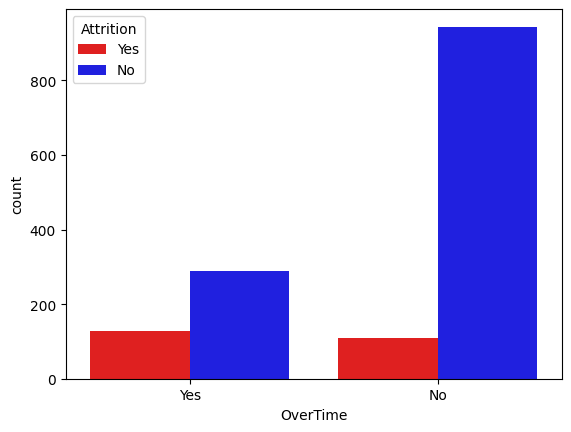

In [15]:
# Examining relationship of attrition and overtime
sns.countplot(data=raw_data, x='OverTime', hue='Attrition', palette={'Yes':'red', 'No':'blue'})

In [16]:
# Percentage of each field that left
round(raw_data[raw_data['Attrition'] == 'Yes']['EducationField'].value_counts() / raw_data['EducationField'].value_counts() * 100, 2)

# Human Resources and Technical degrees have higher rates, but they also have much smaller representation
# EducationField is not likely to be useful to the model, so we'll remove it

EducationField
Life Sciences       14.69
Medical             13.58
Marketing           22.01
Technical Degree    24.24
Other               13.41
Human Resources     25.93
Name: count, dtype: float64

In [17]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='JobLevel', ylabel='MonthlyIncome'>

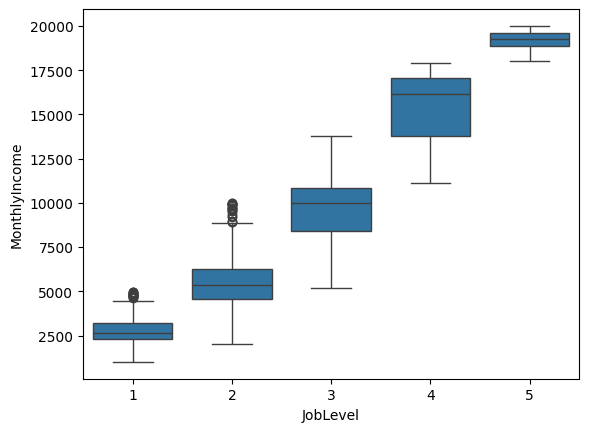

In [18]:
# Check for outliers
sns.boxplot(data=raw_data, x='JobLevel', y='MonthlyIncome')

In [19]:
# We next want to see if any continous variables relate to one another
# To do that, we'll use Seaborn's pairplot()
raw_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

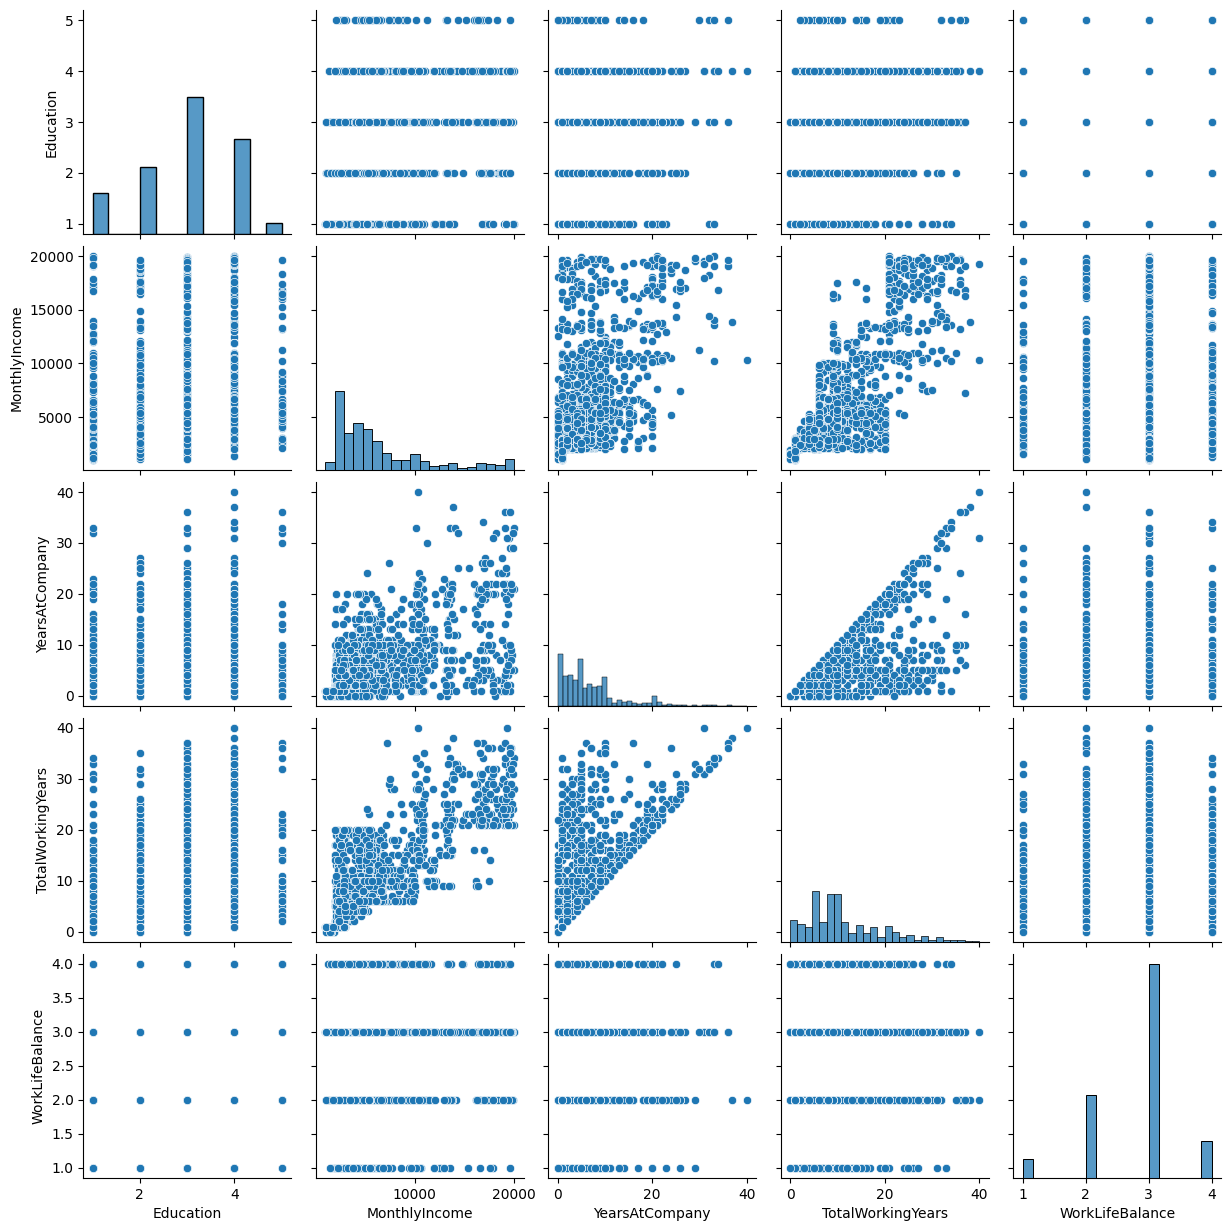

In [20]:
# We'll ignore some continous features (e.g. EmployeeNumber) that likely have no relevance
continuous_data = raw_data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                            'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                            'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction', 
                            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

sns.pairplot(data=continuous_data[['Education', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'WorkLifeBalance']])
plt.show()

- For most of the comparisons we chose (as examples), many do not have a clear linear relationship
- This makes sense for many variable comparisons
  - *An employee's monthly income doesn't linearly correlate with the number of years at the company*
- Some variables do show a linear relationship (e.g. Some linearity between TotalWorkingYears and MonthlyIncome)
  - This would suggest (TotalWorkingYears vs MonthlyIncome) that the longer you've worked the more you're likely paid

In [23]:
pruned_dataset = raw_data.drop(labels=['DailyRate', 'EmployeeNumber', 'EmployeeCount', 'EducationField', 
                                       'Over18', 'StandardHours', 'TrainingTimesLastYear', 'OverTime'], 
                                axis=1)
pruned_dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,11,3,1,0,8,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,23,4,4,1,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,15,3,2,0,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,11,3,3,0,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,12,3,4,1,6,3,2,2,2,2


### Remarks on Feature Selection

- Several methods exist for enabling comparison and selection of only significant features from a dataset (called **wrapper methods**)
  - Backward elimination
  - Forward selection
  - Bidirectional (or recursive) elimination
- Certain ML models (Decision Trees, RandomForest, XGBoost) incorporate feature selection in the model, and therefore it's less important

**General rule for feature selection**
If dataset is LARGE or computational resources are MINIMAL: Filter-based methods or embedded methods
If dataset is SMALL/MANAGEABLE or computational resources are plentiful: Wrapper-based methods or embedded methods